# Newton-Verfahren und automatische Differentiation


## Banachscher Fixpunktsatz

Gegeben sei ein vollständiger metrischer Raum $(X, d(.,.)$ und eine Abbildung $\Phi\colon X\rightarrow X$ auf diesem Raum. 

Weiterhin gelte folgendes:

 - Es gibt ein abgeschlossenes Gebiet $M\subseteq X$ (zum Beispiel $M=X$), aus dem $\Phi$ nicht herausführt: $\Phi(M)\subseteq M$ und

 - Die Abbildung $\Phi$ ist auf $M$ __kontrahierend__, d.h., es gibt ein $0\le k<1$ so dass für alle $x,y\in M$ gilt
    $$
    d(\Phi(x), \Phi(y)) \le k\cdot d(x,y) 
    $$
    
Dann gilt:
  1. $\Phi$ hat __in $M$ genau einen__ Fixpunkt $x^\ast$ so dass
    $$
    \Phi(x^\ast) = x^\ast
    $$
  2. Sei eine Folge $(x_i)_{i\in \mathbb{N}}$ iterativ definiert durch $x_{i+1} = \Phi(x_i)$ mit einem _beliebigen_ Startwert $x_0\in M$. Dann ist diese Folge konvergent und sie konvergiert gegen den Fixpunkt: 
  $$ \lim_{i\rightarrow\infty} x_i = x^\ast.$$     


## Newton-Verfahren  zur Nullstellensuche einer Funktion $f(x)$ 

$$ 
x_{i+1} = \Phi(x_i) := x_i - \frac{f(x_i)}{f'(x_i)} 
$$

Hinreichende Bedingung: 

 - Sei $f(x)$ mindestens einmal stetig differenzierbar.
 - Sei an einer Nullstelle $f(x^\ast)=0$ die erste Ableitung nicht Null: $f'(x^\ast) \ne 0$. 

Dann gibt es ein $\delta>0$, so dass $\Phi$ in dem Gebiet $M=[x^\ast-\delta, x^\ast+\delta]$ kontrahierend ist und daher das Newtonverfahren mit einem Startwert aus diesem Gebiet konvergiert.

## Newton-Verfahren zur Nullstellensuche eines nichtlinearen Gleichungssystems 

Gegeben sei das (i.A. nichtlineare) Gleichungssystem von $n$ Gleichungen im $\mathbf{R}^n$: 
$$
\begin{aligned}
 f_1(x_1,x_2,\dots, x_n) &= 0\\
 f_2(x_1, x_2, \dots, x_n) &= 0\\
  &\vdots \qquad\qquad\textrm{oder kurz:}\qquad\vec{f}(\vec{x})=0   \\
 f_n(x_1, x_2, \dots, x_n) &= 0
\end{aligned}
$$


In diesem Fall verallgemeinert sich die Iterationsvorschrift zu 

$$
\vec{x}_{i+1} = \vec{x}_i - {\mathbf J}^{-1}\cdot \vec{f}\; \big\vert_{x_i}
$$

wobei $\mathbf J$ die Jacobi-Matrix der partiellen ersten Ableitungen  

$$
\mathbf J 
=
\frac{\partial(f_1,..,f_m)}{\partial(x_1, ..,x_n)}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots                             & \ddots & \vdots\\
    \dfrac{\partial f_m}{\partial x_1} & \cdots & \dfrac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

bezeichnet.

In der numerischen Implementierung berechnet man natürlich kein Matrixinverses (langsam __und__ instabil), sondern
löst das Gleichungssystem  $\mathbf J \vec{z} = \vec{f}$ mit anschliessendem $\vec{x}_{i+1} = \vec{x}_i -\vec{z}$.


## Automatisches Differenzieren

### Duale Zahlen

Wir erweitern den Körper $\mathbf{R}$ zum Ring $\mathbf{D}$ der dualen Zahlen (Clifford 1873), indem wir ein 
Element $\epsilon$ hinzufügen mit der Eigenschaft $\epsilon^2=0$. 

> Das Prinzip ist dasselbe wie bei der Erweiterung $\mathbf{R}\Rightarrow \mathbf{C}$ durch Hinzufügen des Elements $i$ mit der Eigenschaft $i^2=-1$. Allerdings ist $\epsilon$ ein Nullteiler und damit $\mathbf{D}$ kein Körper, sondern "nur" ein Ring.  

Die Arithmetik ist offensichtlich: Sei $z_1 = a + b \epsilon$ und $z_2 = a' + b' \epsilon$  mit $a,b,a',b'\in \mathbf{R}$. Dann ist

$$
\begin{aligned}
z_1+ z_2 &= (a+a') + (b + b')\epsilon \\
z_1 \cdot z_2 &= (a+b\epsilon)(a'+b'\epsilon)=aa' + (ab'+a'b)\epsilon\qquad\mathrm{da}\quad \epsilon^2=0 \\
\frac{z_1}{z_2} &= \frac{a+b\epsilon}{a'+b'\epsilon} = \frac{(a+b\epsilon)(a'-b'\epsilon)}{(a'+b'\epsilon)(a'-b'\epsilon)} 
= \frac{aa' +(a'b-ab')\epsilon}{a'^2} = \frac{a}{a'} +\frac{a'b-ab'}{a'^2} \epsilon 
\end{aligned}
$$
usw. 

Mit dem Binomischen Satz wird 
$$
(a+b\epsilon)^n = a^n + na^{n-1}b\epsilon
$$
da alle höheren Potenzen von $\epsilon$ verschwinden. 

Also gilt für jedes Polynom 
$$
P(a + b\epsilon) =  P(a) + P'(a)b\epsilon
$$ 
und insbesondere
$$
P(x+\epsilon) = P(x) + P'(x)\epsilon
$$

Weiterhin bricht jede Taylorentwicklung einer Funktion $f(x+\epsilon)$ um die Stelle $x$ nach 2 Termen ab:

$$
f(x+\epsilon) = f(x) + f'(x)\epsilon
$$

Das ist (eine Implementation der) automatischen Differentation: 

> Wenn wir die Arithmetik dualer Zahlen so implementieren, dass wir für eine Funktion $f(x)$ z.B. den Wert $f(17+1\epsilon)$ als duale Zahl $a + b\epsilon$ ausrechnen können, dann ist $a=f(17)$ und $b=f'(17)$. Wir haben den Funktionswert und Wert der ersten Ableitung berechnet!

In [1]:
# Dual numbers, invented by Clifford in 1873.  \bbiD

struct ⅅ <: Number
    a :: Float64
    b :: Float64
end

In [2]:
import Base: +,-,*,/

z1::ⅅ + z2::ⅅ = ⅅ(z1.a + z2.a, z1.b + z2.b)
z1::ⅅ - z2::ⅅ = ⅅ(z1.a - z2.a, z1.b - z2.b)
z1::ⅅ * z2::ⅅ = ⅅ(z1.a * z2.a, z1.a * z2.b + z1.b * z2.a) 
z1::ⅅ / z2::ⅅ = ⅅ(z1.a / z2.a, (z2.a * z1.b - z1.a * z2.b)/z2.a^2) 


# Regeln für elementare Funktionen, kleine Auswahl 
import Base: sin, log
sin(z::ⅅ) = ⅅ(sin(z.a), cos(z.a) * z.b)
log(z::ⅅ) = ⅅ(log(z.a), 1/z.a * z.b)

Base.convert(::Type{ⅅ}, x::Real) = ⅅ(x, zero(x))
Base.promote_rule(::Type{ⅅ}, ::Type{<:Number}) = ⅅ

In [3]:
# Der Ableitungsoperator: berechnet den Wert f'(x) an der Stelle x

∂(f, x) = f(ⅅ(x, 1)).b

∂ (generic function with 1 method)

In [4]:
# Zum testen

f(x) = 4x^2 + 2x + 5sin(3x) 

# Ableitung
fp(x) = 8x   + 2 + 15cos(3x)  


fp (generic function with 1 method)

In [5]:
@show f(ⅅ(5,1))  f(5) fp(5);


f(ⅅ(5, 1)) = ⅅ(113.25143920078558, 30.60468130711768)
f(5) = 113.25143920078558
fp(5) = 30.60468130711768


In [6]:
∂(f,5)

30.60468130711768

In [7]:

# Implementation von 1dim Newton, 
# f' wird durch Arithmetik dualer Zahlen berechnet


function Newton1(fct, x0; MaxIter = 50, Eps = 1.e-14)
    xold = x0
    i = 0
    while true
        i += 1
        if i > MaxIter
            println(stderr, "Max number of iterations reached without convergence, stop")
            return 
        end
        f = fct( ⅅ(xold, 1) )    # Das liefert  f(xold) und f'(xold)
        
        xnew = xold - f.a/f.b
        println(i," ", xnew)
        if abs(xnew-xold) < Eps
            return xnew
        end
        xold = xnew
    end
end

Newton1 (generic function with 1 method)

In [8]:
Newton1(x-> 2-x^2, 1)

1 1.5
2 1.4166666666666667
3 1.4142156862745099
4 1.4142135623746899
5 1.4142135623730951
6 1.414213562373095


1.414213562373095

In [9]:
x = Newton1(x->2-x^3, 2)    # 3. Wurzel 2

1 1.5
2 1.2962962962962963
3 1.2609322247417485
4 1.2599218605659261
5 1.2599210498953948
6 1.2599210498948732
7 1.2599210498948732


1.2599210498948732

In [10]:
x^3

2.0

## Newton-Verfahren in der Optimierung

- Wir suchen Maximum/Minimum von $F(x_1,x_2,...,x_n)$ im $\mathbb{R}^n$.
- Wir suchen dazu die gemeinsame Nullstelle der $n$ Gleichungen 
$$
f_1=\frac{\partial F(\vec x)}{\partial x_1} = 0, \quad
f_2=\frac{\partial F(\vec x)}{\partial x_2} = 0, \dots,\quad
f_n=\frac{\partial F(\vec x)}{\partial x_n} = 0 \quad
$$

- Damit wird der _Jacobian_ 
$\displaystyle J = \frac{\partial(f_1,..,f_m)}{\partial(x_1, ..,x_n)}$ der ersten Ableitungen der $f_i$ zur
Hesse-Matrix _(Hessian)_ der zweiten Ableitungen von $F$:

$$
\mathbf H= 
\frac{\partial^2 F}{\partial x_i \, \partial x_j} = 
\begin{bmatrix}
  \dfrac{\partial^2 F}{\partial x_1^2} & \dfrac{\partial^2 F}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 F}{\partial x_1\,\partial x_n} \\[2.2ex]
  \dfrac{\partial^2 F}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 F}{\partial x_2^2} & \cdots & \dfrac{\partial^2 F}{\partial x_2\,\partial x_n} \\[2.2ex]
  \vdots & \vdots & \ddots & \vdots \\[2.2ex]
  \dfrac{\partial^2 F}{\partial x_n\,\partial x_1} & \dfrac{\partial^2 F}{\partial x_n\,\partial x_2} & \cdots & \dfrac{\partial^2 F}{\partial x_n^2}
\end{bmatrix}
$$

Die Iterationsvorschrift  wird damit zu
$$
\vec{x}_{new} = \vec{x}_{old} - {\mathbf{ H}}^{-1}\cdot \mathrm{grad} F\;\big \vert_{x_{old}} 
$$

## Das Paket ForwardDiff.jl

- implementiert automatische Differentiation auch für Funktionen mehrerer Variablen
- Funktionen:
```
ForwardDiff.derivative()
ForwardDiff.gradient()
ForwardDiff.Jacobian()
ForwardDiff.hessian()
...
```
- Funktionen mehrere Variablen müssen als Funktionen von _Vektoren_ angelegt sein.

In [11]:
using ForwardDiff, # hessian, gradient
    LinearAlgebra, # norm of arrays
    Plots

In [12]:
"""
Mehrdimensionale Extremwertsuche mittels Newton-Verfahren,
F:       Funktion eines n-vektors
x0vec:   n-Vektor der Startwerte
MaxIter: max. Anzahl von Iterationen
Eps:     Ziel erreicht, wenn Verbesserung in der Vektornorm ||x_neu-x_alt|| < Eps 

Zur späteren Visualisierung werden die m Vektoren  
(m = Anzahl der benötigten Iterationsschritte) 
als nxm-Matrix zurückgegeben.  
"""
function NewtonOpti(F, x0vec; MaxIter = 50, Eps = 1.e-14)
    Xs = copy(x0vec)
    xold = x0vec
    i = 0
    while true
        i += 1
        if i > MaxIter
            println(stderr, "Max number of iterations reached without convergence, stop.")
            return
        end
        H = ForwardDiff.hessian(F, xold)
        del = H \ ForwardDiff.gradient(F, xold)
        xnew = xold -  del
        Xs = hcat(Xs, xnew)
        println(xnew)   
        if norm(del) < Eps
            println("Extremum reached after $i iterations at $xnew")
            return Xs
        end
        xold = xnew
    end
end

NewtonOpti

In [13]:
# unsere 2-dimensionale Testfunktion

function f(x,y) 
    z = (1. - x/2 + x^5 + y^3) * exp(-x^2 - y^2)
    return z
end

# und jetzt mit Vektor-Argument, wie es in ForwardDiff 
# und damit in NewtonOpti() gebraucht wird:

function F(xvec)
    return f(xvec[1], xvec[2])
end

F (generic function with 1 method)

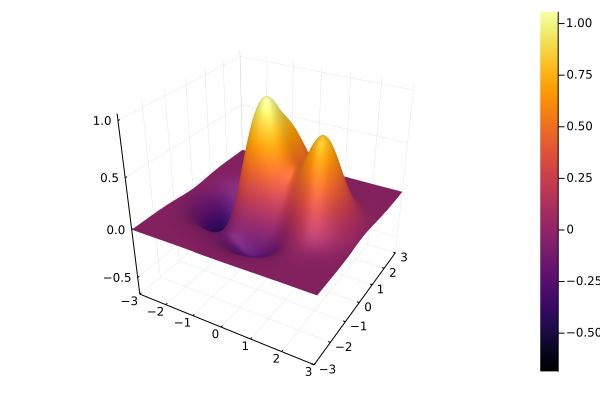

In [14]:
# so sieht sie aus:


surface( -3:0.02:3, -3:0.02:3,  f)

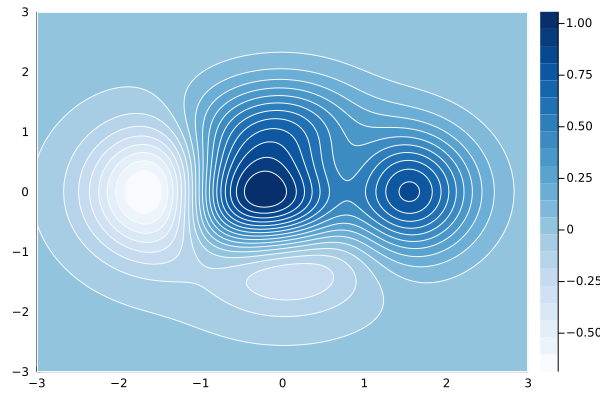

In [15]:
# im Contourplot sieht man die Minima und Maxima

contour( -3:0.02:3, -3:0.02:3,  f, fill=true, c=:Blues, levels=20, contour_labels=false)

In [16]:

# und los gehts: 

xs = NewtonOpti(F, [2.,0.1])

[0.1332054959300537, -0.290375646177925]
[-0.5092885621074995, 0.08142783320806135]
[-0.24479556529773994, -0.03277048936762038]
[-0.22026161325055604, -0.0011927350354439467]
[-0.22004307520481325, -1.91323696826411e-6]
[-0.22004305442098376, -4.94875303235653e-12]
[-0.2200430544209836, -3.310822713486171e-23]
[-0.22004305442098357, 0.0]
Extremum reached after 8 iterations at [-0.22004305442098357, 0.0]


2×9 Matrix{Float64}:
 2.0   0.133205  -0.509289   -0.244796   …  -0.220043     -0.220043
 0.1  -0.290376   0.0814278  -0.0327705     -3.31082e-23   0.0

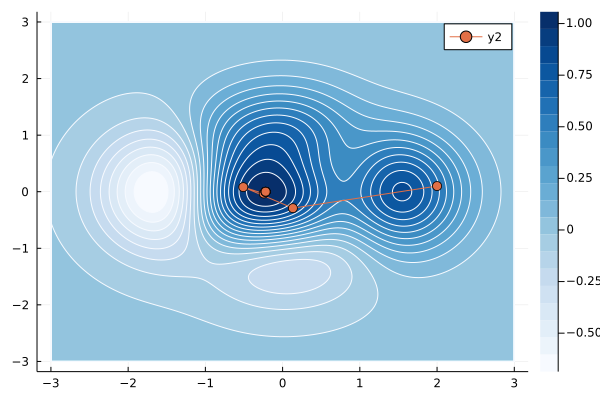

In [17]:
# .. wir zeichen die Schritte des Nowton-verfahrens hin zum 
# gefundenen Maximum ein:

plot!(xs[1,:], xs[2,:], marker=:circle, markersize=5)

In [18]:
# wir kombinieren gleich Berechnung und Visualisierung 
# und bauen die Möglichkeit ein, 
# Ausschnitte mit den Grenzen [(x1,x2),(y1,y2)] zu plotten

function MakePlot(x0; x1=-3, x2=3, y1=-3, y2=3)
    xs = NewtonOpti(F, x0)
    p = contour( range(x1,x2,300), range(y1,y2,300),  f, fill=true, c=:Blues, levels=20, 
        contour_labels=false)
    plot!(xs[1,:], xs[2,:], marker=:circle, markersize=5, linesize=2)
end

MakePlot (generic function with 1 method)

[0.1332054959300537, -0.290375646177925]
[-0.5092885621074995, 0.08142783320806135]
[-0.24479556529773994, -0.03277048936762038]
[-0.22026161325055604, -0.0011927350354439467]
[-0.22004307520481325, -1.91323696826411e-6]
[-0.22004305442098376, -4.94875303235653e-12]
[-0.2200430544209836, -3.310822713486171e-23]
[-0.22004305442098357, 0.0]
Extremum reached after 8 iterations at [-0.22004305442098357, 0.0]


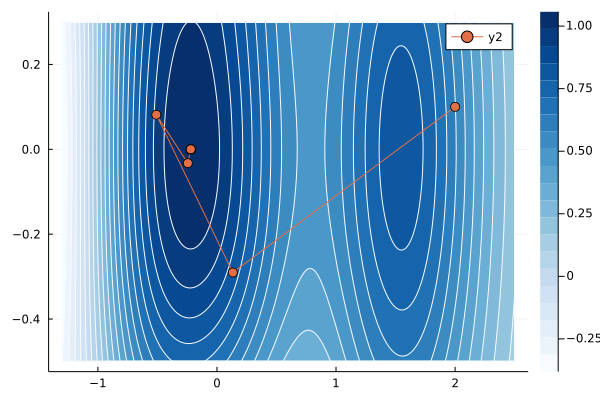

In [19]:
# und das obige Bild nochmal im Ausschnitt
# ... Interesanterweise geht der erste Iterationsschritt am nächstgelegenem 
# Maximum vorbei und das Verfahren läuft zum anderen Maximum...


MakePlot([2,.1], x1=-1.3, x2=2.5, y1=-.5, y2=.3)

[0.6956106547605012, 0.03171439130151904]
[0.7920383277477394, -0.0004734597583571504]
[0.7890525789862474, -3.9117647761667627e-7]
[0.7890542734775248, -2.518659773261041e-13]
[0.7890542734780247, -1.044578056257455e-25]
[0.7890542734780247, 0.0]
Extremum reached after 6 iterations at [0.7890542734780247, 0.0]


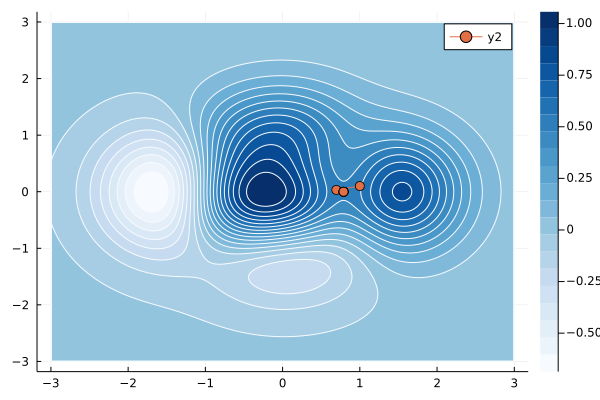

In [20]:
MakePlot([1,0.1])

[0.6956106547605012, 0.03171439130151904]
[0.7920383277477394, -0.0004734597583571504]
[0.7890525789862474, -3.9117647761667627e-7]
[0.7890542734775248, -2.518659773261041e-13]
[0.7890542734780247, -1.044578056257455e-25]
[0.7890542734780247, 0.0]
Extremum reached after 6 iterations at [0.7890542734780247, 0.0]


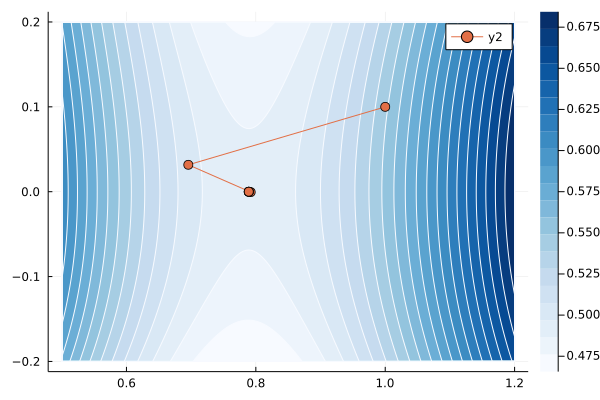

In [21]:
# ..und diesmal treffen wir den Saddelpunkt. 
# da verschwinden natürlich auch alle partiellen Ableitungen

MakePlot([1,0.1], x1=0.5, x2=1.2, y1=-.2, y2=.2)

[-1.6584806215974253, -0.03160877603265452]
[-1.6881945075073073, 0.0003759256128861993]
[-1.6888385202356129, 1.696332552631732e-8]
[-1.688838885976237, 3.627747814500337e-17]
[-1.6888388859763552, 0.0]
[-1.6888388859763555, 0.0]
Extremum reached after 6 iterations at [-1.6888388859763555, 0.0]


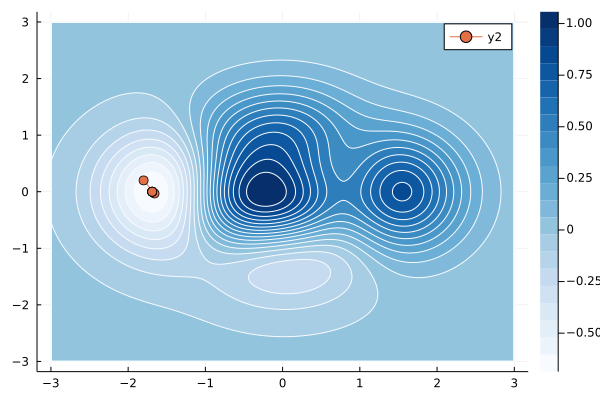

In [22]:
# mit diesem Startwert geht's zu einem der Minima

MakePlot( [-1.8,0.2])

[-1.6584806215974253, -0.03160877603265452]
[-1.6881945075073073, 0.0003759256128861993]
[-1.6888385202356129, 1.696332552631732e-8]
[-1.688838885976237, 3.627747814500337e-17]
[-1.6888388859763552, 0.0]
[-1.6888388859763555, 0.0]
Extremum reached after 6 iterations at [-1.6888388859763555, 0.0]


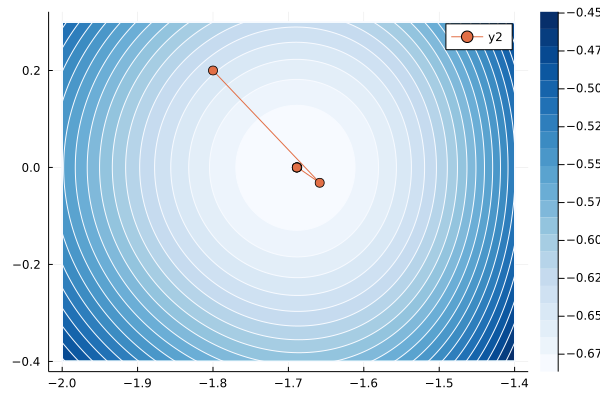

In [23]:
#nochmal als Ausschnitt

MakePlot([-1.8,.2], x1=-2, x2=-1.4, y1=-.4, y2=.3)

[1.7495598911691388, -0.1481347995568894]
[1.4979885189593156, 0.03284641414014772]
[1.5486102113661622, -0.0006009360354399529]
[1.5477195717036256, -5.706673652540722e-8]
[1.5477195171353288, -5.36382925634516e-16]
[1.5477195171353284, -9.860761315262648e-32]
Extremum reached after 6 iterations at [1.5477195171353284, -9.860761315262648e-32]


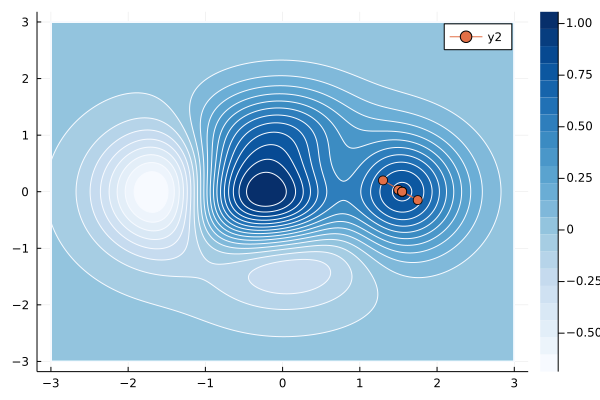

In [24]:
# und mit diesem Startwert erreichen wir auch das rechte Maximum

MakePlot([1.3,0.2])

[1.7495598911691388, -0.1481347995568894]
[1.4979885189593156, 0.03284641414014772]
[1.5486102113661622, -0.0006009360354399529]
[1.5477195717036256, -5.706673652540722e-8]
[1.5477195171353288, -5.36382925634516e-16]
[1.5477195171353284, -9.860761315262648e-32]
Extremum reached after 6 iterations at [1.5477195171353284, -9.860761315262648e-32]


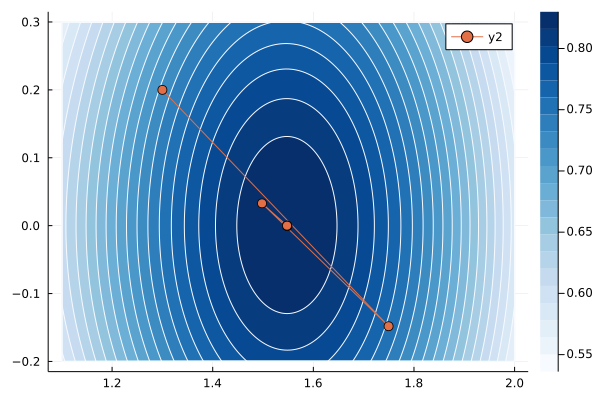

In [25]:
# nochmal als Ausschnitt

MakePlot([1.3,.2], x1=1.1, x2=2, y1=-.2, y2=.3)